<a href="https://colab.research.google.com/github/AnVo01/AI/blob/AI/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers import Dense,Flatten

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1000,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(train_d,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
391/391 [==============================] - 23s 57ms/step - loss: 1.8209 - accuracy: 0.3484 - val_loss: 1.6544 - val_accuracy: 0.4132
Epoch 2/20
391/391 [==============================] - 22s 56ms/step - loss: 1.6233 - accuracy: 0.4203 - val_loss: 1.5896 - val_accuracy: 0.4459
Epoch 3/20
391/391 [==============================] - 22s 56ms/step - loss: 1.5465 - accuracy: 0.4510 - val_loss: 1.5056 - val_accuracy: 0.4614
Epoch 4/20
391/391 [==============================] - 22s 55ms/step - loss: 1.4820 - accuracy: 0.4748 - val_loss: 1.5346 - val_accuracy: 0.4571
Epoch 5/20
391/391 [==============================] - 21s 55ms/step - loss: 1.4389 - accuracy: 0.4916 - val_loss: 1.5059 - val_accuracy: 0.4650
Epoch 6/20
391/391 [==============================] - 21s 54ms/step - loss: 1.3905 - accuracy: 0.5077 - val_loss: 1.4248 - val_accuracy: 0.4927
Epoch 7/20
391/391 [==============================] - 21s 54ms/step - loss: 1.3559 - accuracy: 0.5196 - val_loss: 1.4032 - val_accuracy:

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  1.366365671157837
độ chính xác kiểm tra là:  0.5331000089645386


In [ ]:
predictions=model.predict(x_test)
names=['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']


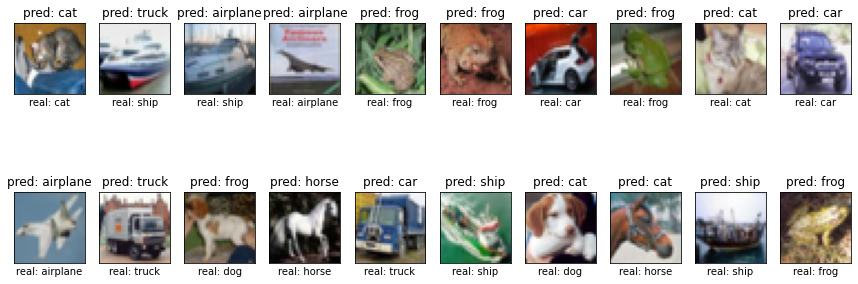

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(20):
  plt.subplot(5,10, i+1)
  plt.imshow(x_test[i])
  plt.title("pred: " + names[np.argmax(model.predict(x_test[i].reshape((-1, 32, 32, 3))))])
  plt.xlabel("real: " + names[np.argmax(y_test[i])])
  plt.xticks([])
  plt.yticks([])
plt.show()
#title is predicted image
#xlabel is  reality image

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 1000)              3073000   
                                                                 
 dense_10 (Dense)            (None, 512)               512512    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 3,590,642
Trainable params: 3,590,642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save('/content/gdrive/MyDrive/AI/cifar10.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/AI/cifar10.h5')

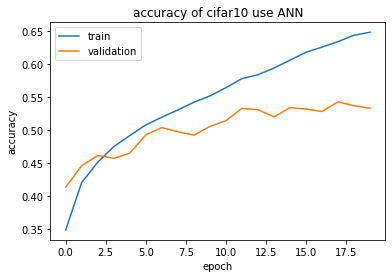

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of cifar10 use ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()